In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv', low_memory=False)

In [3]:
data.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"


In [4]:
data['Driver Substance Abuse'].value_counts()

Driver Substance Abuse
NONE DETECTED                                          122545
Not Suspect of Alcohol Use, Not Suspect of Drug Use     16444
UNKNOWN                                                 11990
ALCOHOL PRESENT                                          4087
Unknown, Unknown                                         1965
ALCOHOL CONTRIBUTED                                      1435
Suspect of Alcohol Use, Not Suspect of Drug Use           489
ILLEGAL DRUG PRESENT                                      259
MEDICATION PRESENT                                        117
ILLEGAL DRUG CONTRIBUTED                                  102
COMBINED SUBSTANCE PRESENT                                 92
MEDICATION CONTRIBUTED                                     64
OTHER                                                      59
Suspect of Alcohol Use, Unknown                            58
COMBINATION CONTRIBUTED                                    47
Unknown, Not Suspect of Drug Use               

In [5]:
data.groupby('Vehicle Make').agg({'Vehicle Make': ['count']}).sort_values(by=('Vehicle Make','count'), ascending=False).head(50)

,Vehicle Make
,count
Vehicle Make,
TOYOTA,26794
HONDA,21634
FORD,18926
NISSAN,9643
TOYT,8841
HOND,5765
DODGE,4896
CHEVROLET,4820


In [6]:
cleaned_data = data

In [7]:
# Vehicle Make cleaning
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['TOYT','TOYO','TOYTA', 'TOY'], 'TOYOTA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('HOND', 'HONDA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['CHEVY', 'CHEV','CHEYV'], 'CHEVROLET')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('NISS', 'NISSAN')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['HYUN','HYUNDIA','HYUNUNDAI','HYUNUDAI','HYUUNDAI'], 'HYUNDAI')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['MERCEDES-BE','MERCEDESS','MERCEDES ZBENZ','MERCEDES ENZ','MERCEDEZ BENS','MERCEDS','MERDECES','MERCRDEZ BENZ','MERCEZ','MERCENDES','MERCEES','MERCEEDEZ','MERCEES','MERZ','MERCEDES', 'MERC','MERCEDES BENZ','MERCEDEZ','MEZ','MERZEDEZ','MERZEDES BENZ','MERZ 4S','MERX','MERS-BENZ','MERECEDEZ','MERDEDES','MERDECES-BENZ','MERCRY','MERDECES-BENZ'], 'MERCEDES-BENZ')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['VOLK','VOLKS','VW'], 'VOLKSWAGEN')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('ACUR', 'ACURA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('SUBA', 'SUBARU')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('DODG', 'DODGE')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['THOM', 'THOMAS','THMS'], 'THOMAS BUILT')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('MAZD', 'MAZDA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['LEXS','LEXU','LESUX','LEXUUS','LEXUSZ','LEXUSS','LEXI'], 'LEXUS')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('FRHT', 'FREIGHTLINER')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('VOLV', 'VOLVO')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('INFI', 'INFINITI')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['GILL','GILG','GILLLIG BU','GILLS','GILLMAN'],'GILLIG')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('CHRY', 'CHRYSLER')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('BUIC', 'BUICK')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['CADI','CADDILAC','CADILACC','CADILLA'], 'CADILLAC')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['INFINITY','INFINITIG'], 'INFINITI')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('LINC', 'LINCOLN')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('INTL', 'INTERNATIONAL')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('NISSIAN', 'NISSAN')

#Substance cleaning
cleaned_data['Driver Substance Abuse'] = cleaned_data['Driver Substance Abuse'].str.upper()
cleaned_data['Driver Substance Abuse'] = cleaned_data['Driver Substance Abuse'].replace('UNKNOWN, UNKNOWN', 'UNKNOWN')
cleaned_data['Driver Substance Abuse'] = cleaned_data['Driver Substance Abuse'].replace('SUSPECT OF ALCOHOL USE, UNKNOWN', 'SUSPECT OF ALCOHOL USE, NOT SUSPECT OF DRUG USE')

#Traffic controls
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].replace('TRAFFIC CONTROL SIGNAL', 'TRAFFIC SIGNAL')
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].replace('FLASHING TRAFFIC CONTROL SIGNAL','FLASHING TRAFFIC SIGNAL')
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].fillna('UNKNOWN')

# Weather
cleaned_data['Weather'] = cleaned_data['Weather'].str.upper()
cleaned_data['Weather'] = cleaned_data['Weather'].fillna('UNKNOWN')


#Surface condition
cleaned_data['Surface Condition'] = cleaned_data['Surface Condition'].str.upper()
cleaned_data['Surface Condition'] = cleaned_data['Surface Condition'].replace(['WATER(STANDING/MOVING)','WATER (STANDING, MOVING)'],'WET')
cleaned_data['Surface Condition'] = cleaned_data['Surface Condition'].replace('ICE/FROST','ICE')


#Light
cleaned_data['Light'] = cleaned_data['Light'].str.upper()
cleaned_data['Light'] = cleaned_data['Light'].replace('DARK - LIGHTED','DARK LIGHTS')
cleaned_data['Light'] = cleaned_data['Light'].replace('DARK - NOT LIGHTED','DARK NO LIGHTS')
cleaned_data['Light'] = cleaned_data['Light'].replace(['DARK -- UNKNOWN LIGHTING','DARK - UNKNOWN LIGHTING'],'DARK')





In [8]:
cleaned_data['Light'].value_counts()[0:10]

Light
DAYLIGHT          129261
DARK LIGHTS ON     39551
DARK NO LIGHTS      5675
DARK LIGHTS         4524
DUSK                4202
DAWN                3693
DARK                1704
UNKNOWN              743
OTHER                411
Name: count, dtype: int64

In [9]:
data.groupby('Vehicle Make').agg({'Vehicle Make': ['count']}).sort_values(by=('Vehicle Make','count'), ascending=False).head(30)

,Vehicle Make
,count
Vehicle Make,
TOYOTA,36100
HONDA,27399
FORD,18926
NISSAN,12432
CHEVROLET,11703
HYUNDAI,6909
DODGE,5759
MERCEDES-BENZ,4297


In [10]:
cleaned_data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [11]:
cleaned_data['Drivers License State'].value_counts().head(10)

Drivers License State
MD    158088
DC      5632
VA      5498
XX      1836
PA      1215
FL       843
NY       594
WV       501
MA       451
NC       442
Name: count, dtype: int64

In [12]:
cleaned_data['Vehicle Damage Extent'] = cleaned_data['Vehicle Damage Extent'].str.upper()

<Axes: xlabel='Vehicle Damage Extent'>

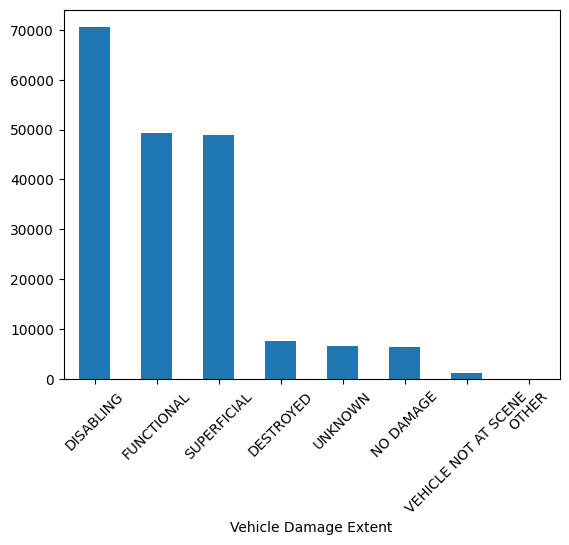

In [13]:
cleaned_data['Vehicle Damage Extent'].value_counts().plot(kind='bar', rot=45)


In [14]:
cleaned_data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

<Axes: xlabel='Injury Severity'>

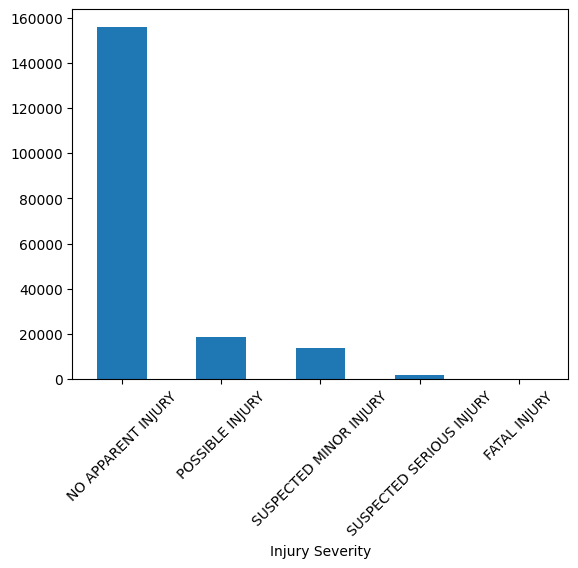

In [15]:
cleaned_data['Injury Severity'] = cleaned_data['Injury Severity'].str.upper()
cleaned_data['Injury Severity'].value_counts().plot(kind='bar', rot=45)

In [16]:
cleaned_data[cleaned_data['Vehicle Model'] == '4S']['Vehicle Make'].value_counts().head(30)

Vehicle Make
TOYOTA           3367
HONDA            2380
NISSAN           1065
HYUNDAI           834
FORD              691
CHEVROLET         529
MERCEDES-BENZ     514
LEXUS             504
ACURA             499
BMW               427
MAZDA             375
VOLKSWAGEN        338
DODGE             228
KIA               211
SUBARU            190
AUDI              157
BUICK             155
INFINITI          149
VOLVO             149
CHRYSLER          130
CADILLAC          107
LINCOLN            82
MITS               79
PONT               48
TESLA              35
SATURN             34
VOLKSWAGON         30
STRN               23
PONTIAC            23
SAAB               22
Name: count, dtype: int64

In [17]:
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].str.upper()

In [18]:
cleaned_data['Traffic Control'].value_counts()

Traffic Control
NO CONTROLS                                                                 77603
TRAFFIC SIGNAL                                                              58898
UNKNOWN                                                                     27426
STOP SIGN                                                                   13593
TRAFFIC CONTROL SIGNAL                                                       6199
FLASHING TRAFFIC SIGNAL                                                      2132
OTHER                                                                        2074
YIELD SIGN                                                                   1899
FLASHING TRAFFIC CONTROL SIGNAL                                               376
PERSON                                                                        282
WARNING SIGN                                                                  154
LANE USE CONTROL SIGNAL                                                       144


<Axes: xlabel='Vehicle First Impact Location'>

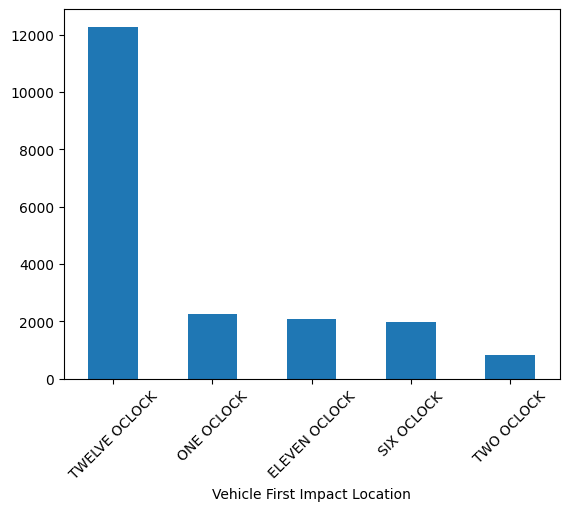

In [19]:
cleaned_data[(cleaned_data['Traffic Control'] == 'TRAFFIC SIGNAL') & (cleaned_data['Vehicle Damage Extent'] == 'DISABLING')]['Vehicle First Impact Location'].value_counts().head(5).plot(kind='bar', rot=45)


In [20]:
cleaned_data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [21]:
columns = ['Speed Limit','Injury Severity','Collision Type','Weather','Circumstance','Surface Condition','Light','Traffic Control','Vehicle First Impact Location','Vehicle Damage Extent']
subset = cleaned_data[columns]
large_data = cleaned_data[cleaned_data['Circumstance'].isna()]
large_data = large_data[columns]
large_data = large_data.drop('Circumstance', axis=1)

In [22]:
large_data['Surface Condition'].fillna('UNKNOWN')
large_data['Predicted_Label'] = -1
large_data

,Speed Limit,Injury Severity,Collision Type,Weather,Surface Condition,Light,Traffic Control,Vehicle First Impact Location,Vehicle Damage Extent,Predicted_Label
0,0,NO APPARENT INJURY,OTHER,CLEAR,NaN,DAYLIGHT,NO CONTROLS,ONE OCLOCK,SUPERFICIAL,-1
1,5,NO APPARENT INJURY,OTHER,CLEAR,NaN,DAYLIGHT,NO CONTROLS,UNKNOWN,UNKNOWN,-1
2,15,NO APPARENT INJURY,OTHER,CLEAR,NaN,DAYLIGHT,UNKNOWN,SIX OCLOCK,NO DAMAGE,-1
3,15,NO APPARENT INJURY,SINGLE VEHICLE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,UNKNOWN,NO DAMAGE,-1
4,35,NO APPARENT INJURY,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DARK LIGHTS ON,STOP SIGN,TWELVE OCLOCK,DISABLING,-1
...,...,...,...,...,...,...,...,...,...,...
191199,25,NO APPARENT INJURY,"Sideswipe, Opposite Direction",CLEAR,DRY,DAYLIGHT,NO CONTROLS,Twelve O Clock,DISABLING,-1
191201,35,NO APPARENT INJURY,Angle,CLEAR,DRY,DARK LIGHTS,NO CONTROLS,Twelve O Clock,DISABLING,-1
191205,30,SUSPECTED MINOR INJURY,Front to Front,CLEAR,DRY,DAYLIGHT,NO CONTROLS,Eleven O Clock,DISABLING,-1
191207,25,NO APPARENT INJURY,"Sideswipe, Same Direction",CLEAR,DRY,DAYLIGHT,NO CONTROLS,Ten O Clock,FUNCTIONAL,-1


In [23]:
subset = subset.dropna()

In [24]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33694 entries, 16 to 191206
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Speed Limit                    33694 non-null  int64 
 1   Injury Severity                33694 non-null  object
 2   Collision Type                 33694 non-null  object
 3   Weather                        33694 non-null  object
 4   Circumstance                   33694 non-null  object
 5   Surface Condition              33694 non-null  object
 6   Light                          33694 non-null  object
 7   Traffic Control                33694 non-null  object
 8   Vehicle First Impact Location  33694 non-null  object
 9   Vehicle Damage Extent          33694 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.8+ MB


In [25]:
subset['Circumstance'] 
subset['Circumstance'].value_counts()[10:20]

Circumstance
N/A, ROAD UNDER CONSTRUCTION/MAINTENANCE                                         456
Followed Too Closely                                                             426
Other Improper Action                                                            416
DEBRIS OR OBSTRUCTION, N/A                                                       292
ICY OR SNOW-COVERED, SLEET, HAIL, FREEZ. RAIN                                    253
Too Fast For Conditions                                                          250
Failed to Keep in Proper Lane                                                    202
V WIPERS|W OTHER ENVIRONMENTAL, WET                                              162
Operated Motor Vehicle in Inattentive, Careless, Negligent, or Erratic Manner    159
Ran Red Light                                                                    149
Name: count, dtype: int64

In [26]:
# Define keywords for collisions (1) and non-collisions (0)
collision_keywords = ['Followed Too Closely','Followed Too Closely ','Improper Passing','Too Fast For Conditions','Ran Red Light','Failed to Keep in Proper Lane','Failed to Yield Right-of-Way','Operated Motor Vehicle in Inattentive, Careless, Negligent, or Erratic Manner', 'Improper Turn']
non_collision_keywords = ['ICY OR SNOW-COVERED, RAIN, SNOW', 'BACKUP DUE TO REGULAR CONGESTION', 'DEBRIS OR OBSTRUCTION']

# Assign labels:

subset['Collision'] = -1  # Default all to -1
subset.loc[subset['Circumstance'].str.contains('|'.join(collision_keywords), case=False, na=False), 'Collision'] = 1
subset.loc[subset['Circumstance'].str.contains('|'.join(non_collision_keywords), case=False, na=False), 'Collision'] = 0


In [27]:
subset['Collision'].value_counts()

Collision
-1    27907
 1     3516
 0     2271
Name: count, dtype: int64

In [28]:
subset['Surface Condition'] = subset['Surface Condition'].str.upper()
subset['Surface Condition'].value_counts()

Surface Condition
WET                  24097
DRY                   7237
ICE                   1057
SNOW                   932
SLUSH                  190
OTHER                   80
MUD, DIRT, GRAVEL       47
OIL                     27
UNKNOWN                 24
SAND                     3
Name: count, dtype: int64

In [ ]:
import numpy as np

from sklearn.semi_supervised import LabelPropagation
from sklearn.preprocessing import OneHotEncoder 


1.3.1


In [40]:
pip install -U scikit-learn==1.6.1  

In [37]:
# Define categorical features
categorical_cols = ['Surface Condition', 'Weather', 'Traffic Control', 'Speed Limit']

# One-Hot Encode categorical features for the subset
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_categorical_subset = encoder.fit_transform(subset[categorical_cols])

# Prepare labels for Label Propagation
y_subset = subset['Collision']

# Train Label Propagation Model
label_prop_model = LabelPropagation(kernel='knn')
label_prop_model.fit(X_categorical_subset, y_subset)

# Transform the large dataset
X_categorical_large = encoder.transform(large_data[categorical_cols])

# Predict labels
subset['Predicted_Label'] = label_prop_model.predict(X_categorical_subset)
large_data['Predicted_Label'] = label_prop_model.predict(X_categorical_large)

# Output results
print("Predicted Labels in Subset:")
print(subset['Predicted_Label'].value_counts())

print("\nPredicted Labels in Large Dataset:")
print(large_data['Predicted_Label'].value_counts())

c:\Users\Ivan Anderies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


Predicted Labels in Subset:
Predicted_Label
0    31550
1     2144
Name: count, dtype: int64

Predicted Labels in Large Dataset:
Predicted_Label
0    143415
1     11445
Name: count, dtype: int64


In [31]:
# Ensure both datasets have the same columns
subset['Predicted_Label'] = subset['Predicted_Label'].astype(int)  # Ensure dtype consistency
large_data['Predicted_Label'] = large_data['Predicted_Label'].astype(int)  

# Combine into a master dataset
master_data = pd.concat([subset, large_data], ignore_index=True)
master_data.drop(['Collision','Circumstance'], axis=1, inplace=True)
# Check the shape and column consistency
print(master_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188554 entries, 0 to 188553
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Speed Limit                    188554 non-null  int64 
 1   Injury Severity                187483 non-null  object
 2   Collision Type                 188063 non-null  object
 3   Weather                        188554 non-null  object
 4   Surface Condition              168938 non-null  object
 5   Light                          187250 non-null  object
 6   Traffic Control                188554 non-null  object
 7   Vehicle First Impact Location  188444 non-null  object
 8   Vehicle Damage Extent          188290 non-null  object
 9   Predicted_Label                188554 non-null  int32 
dtypes: int32(1), int64(1), object(8)
memory usage: 13.7+ MB
None


In [32]:
master_data['Predicted_Label'].value_counts()

Predicted_Label
0    174965
1     13589
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer


# Drop NaN values
master_data = master_data.dropna()

# Separate features and target
X = master_data.drop('Predicted_Label', axis=1)
y = master_data['Predicted_Label']

X_feature = X.columns
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define transformations
preprocessor = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_cols),  # Encode categorical columns
    ('num', StandardScaler(), numeric_cols)      # Standardize numerical columns
])

# Transform features
X = preprocessor.fit_transform(X)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)


# Define the models and their parameter grids
param_grid_rf = {
        'n_estimators': [50],
        'max_depth': [None, 5,10],
        'min_samples_leaf' :[10,15,20]
    }
param_grid_knn = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
    }

RF = RandomForestClassifier(random_state=42069)

Knn_C = KNeighborsClassifier()

grid_rf = GridSearchCV(RF,param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_KNN = GridSearchCV(Knn_C, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

grid_rf.fit(X_train,y_train)
grid_KNN.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31315
           1       0.98      0.95      0.97      2008

    accuracy                           1.00     33323
   macro avg       0.99      0.97      0.98     33323
weighted avg       1.00      1.00      1.00     33323



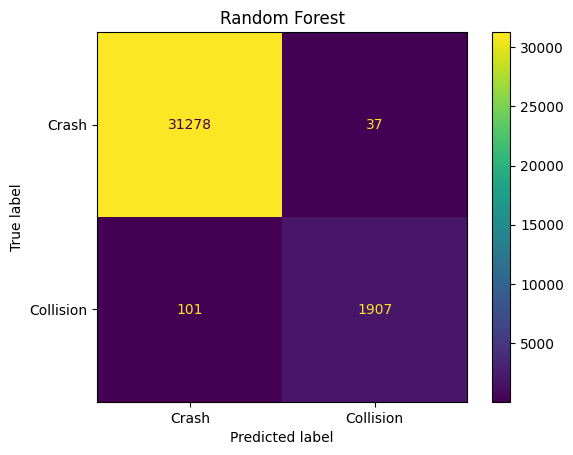

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31315
           1       0.92      0.87      0.89      2008

    accuracy                           0.99     33323
   macro avg       0.95      0.93      0.94     33323
weighted avg       0.99      0.99      0.99     33323



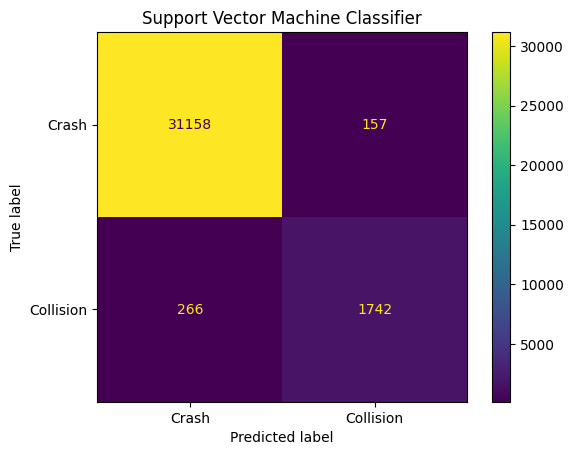

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf_rf = grid_rf.best_estimator_
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=clf_rf.classes_)

print(classification_report(y_test, y_pred_rf))

cm_disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Crash', 'Collision'])

cm_disp_rf.plot()
plt.title("Random Forest")
plt.show()

clf_KNN = grid_KNN.best_estimator_
clf_KNN.fit(X_train, y_train)

y_pred_KNN = clf_KNN.predict(X_test)


cm_KNN = confusion_matrix(y_test, y_pred_KNN, labels=clf_KNN.classes_)

print(classification_report(y_test, y_pred_KNN))

cm_disp_KNN = ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=['Crash', 'Collision'])

cm_disp_KNN.plot()

plt.title("Support Vector Machine Classifier")
plt.show()



In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

# Drop NaN values
master_data = master_data.dropna()

# Separate features and target
X = master_data.drop('Predicted_Label', axis=1)
y = master_data['Predicted_Label']

X_feature = X.columns
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define transformations
preprocessor = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_cols),  # Encode categorical columns
    ('num', StandardScaler(), numeric_cols)      # Standardize numerical columns
])

# Transform features
X = preprocessor.fit_transform(X)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

clf = RandomForestClassifier(n_estimators=75, max_depth=7, min_samples_leaf=15, random_state=42)
#clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Print evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


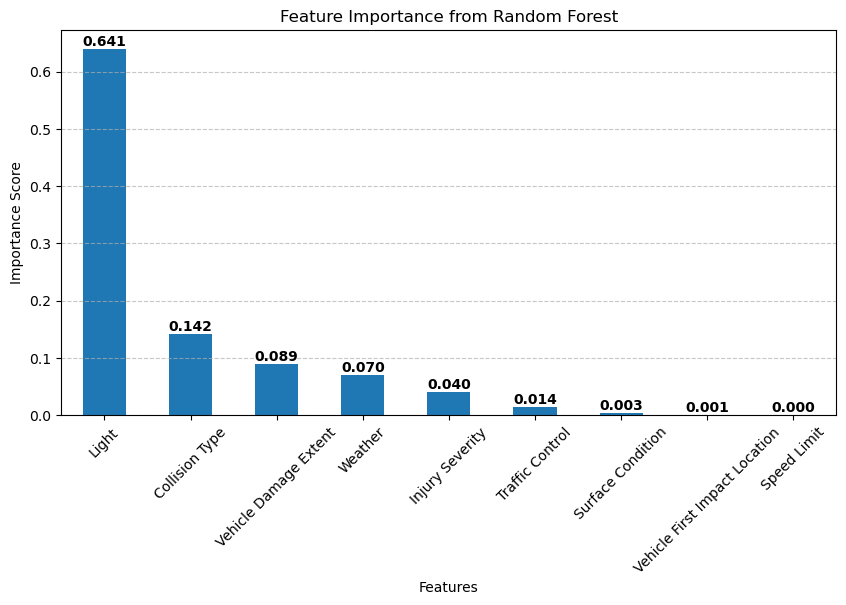

In [ ]:
import matplotlib.pyplot as plt
# Get feature importance
importances = clf.feature_importances_

importance_df = pd.DataFrame({'Feature': X_feature, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create the plot
ax = importance_df.set_index("Feature").plot(kind="bar", figsize=(10, 5), legend=False)

# Add value labels on top of bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        bar.get_height(),  # Y-coordinate (height of bar)
        f"{bar.get_height():.3f}",  # Value formatted to 3 decimal places
        ha="center",  # Align horizontally at center
        va="bottom",  # Align text at bottom of value
        fontsize=10, 
        fontweight="bold"
    )

# Customize the plot
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

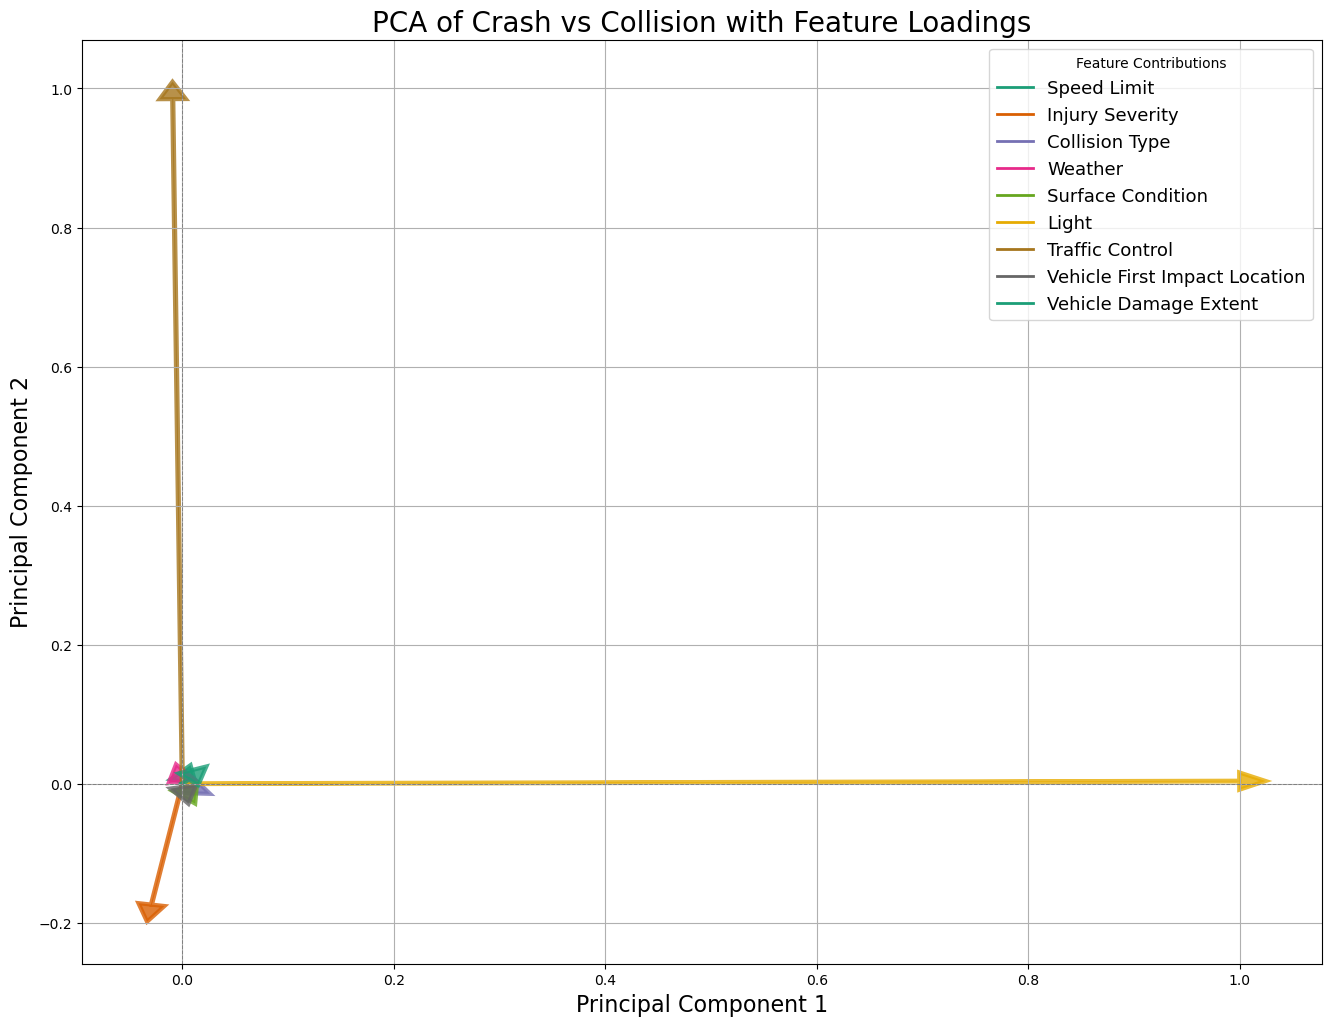

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns

feature_names = list(master_data.drop('Predicted_Label', axis=1).columns)
# Perform PCA, reducing to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define colors for binary classes
colors = ['blue', 'red']
labels = ['Crash', 'Collision']

# Get PCA loadings (feature contributions)
loading_vectors = pca.components_.T  

# Generate distinct colors for each feature
feature_colors = sns.color_palette("Dark2", len(feature_names))  # Use a color palette

plt.figure(figsize=(16, 12))
# Plot feature vectors as arrows
for i in range(len(feature_names)):
    plt.arrow(0, 0, 
              loading_vectors[i, 0], 
              loading_vectors[i, 1], 
              color=feature_colors[i], alpha=0.8, head_width=0.025, head_length=0.025, linewidth=3)
    
    # plt.text(loading_vectors[i, 0] * 1.15, 
    #          loading_vectors[i, 1] * 1.15 + 0.02,  # Shift labels slightly above
    #          feature_names[i], color=feature_colors[i], fontsize=10, ha='center', va='center')

# Add legend with feature names and colors
legend_patches = [plt.Line2D([0], [0], color=feature_colors[i], lw=2, label=feature_names[i]) 
                  for i in range(len(feature_names))]
plt.legend(handles=legend_patches, loc='upper right', fontsize=13, title="Feature Contributions")

plt.xlabel('Principal Component 1',fontsize=16)
plt.ylabel('Principal Component 2',fontsize = 16)
plt.title('PCA of Crash vs Collision with Feature Loadings', fontsize=20)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.grid(True)

plt.show()


In [ ]:
print(pca.explained_variance_ratio_)


[0.37193036 0.2652549 ]


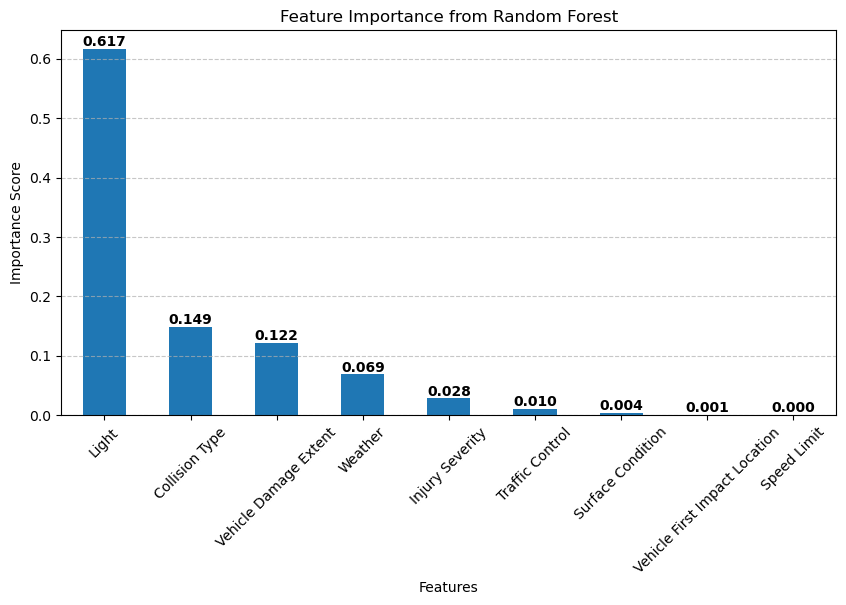

In [ ]:
import matplotlib.pyplot as plt
# Get feature importance
importances = clf.feature_importances_

importance_df = pd.DataFrame({'Feature': X_feature, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create the plot
ax = importance_df.set_index("Feature").plot(kind="bar", figsize=(10, 5), legend=False)

# Add value labels on top of bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        bar.get_height(),  # Y-coordinate (height of bar)
        f"{bar.get_height():.3f}",  # Value formatted to 3 decimal places
        ha="center",  # Align horizontally at center
        va="bottom",  # Align text at bottom of value
        fontsize=10, 
        fontweight="bold"
    )

# Customize the plot
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()
